In [1]:
#importin padas because it is very fast and easy to process data,convert into dataframes and allows us to perform many operations
import pandas as pd
#numpy is for mathamatical calculations
import numpy as np
#for graphs and plots
import matplotlib .pyplot as plt

%matplotlib inline

import seaborn as sns

#to work with time anda date datypes
import time,datetime
#avoid warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#readinf csv file
df = pd.read_csv('My Uber Drives - 2016.csv',encoding='latin1')

In [3]:
#fisrt five rows of data
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [4]:

df.columns = df.columns.str.replace('*',"")

In [5]:
df.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE'],
      dtype='object')

In [6]:
df.tail()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [7]:
df.info()
#oupt shows PURPOSE contains a lot of null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [8]:
df.shape
#1156 roes and 7 columns and 2D array

(1156, 7)

In [9]:
df.describe()
#This function gives some mathametical description of numerical data
#Here in this case only MILES column is considered because that is the only numerical data

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [10]:
#handling missing values
df.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [11]:
df.isnull()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1151,False,False,False,False,False,False,False
1152,False,False,False,False,False,False,False
1153,False,False,False,False,False,False,False
1154,False,False,False,False,False,False,False


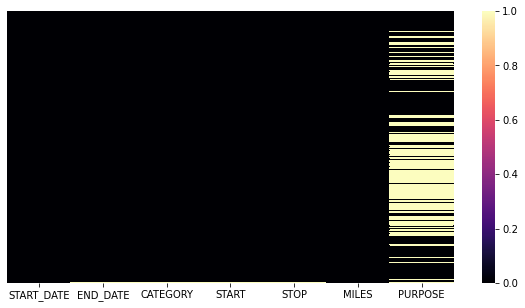

In [12]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),cmap='magma',yticklabels=False)
plt.show()

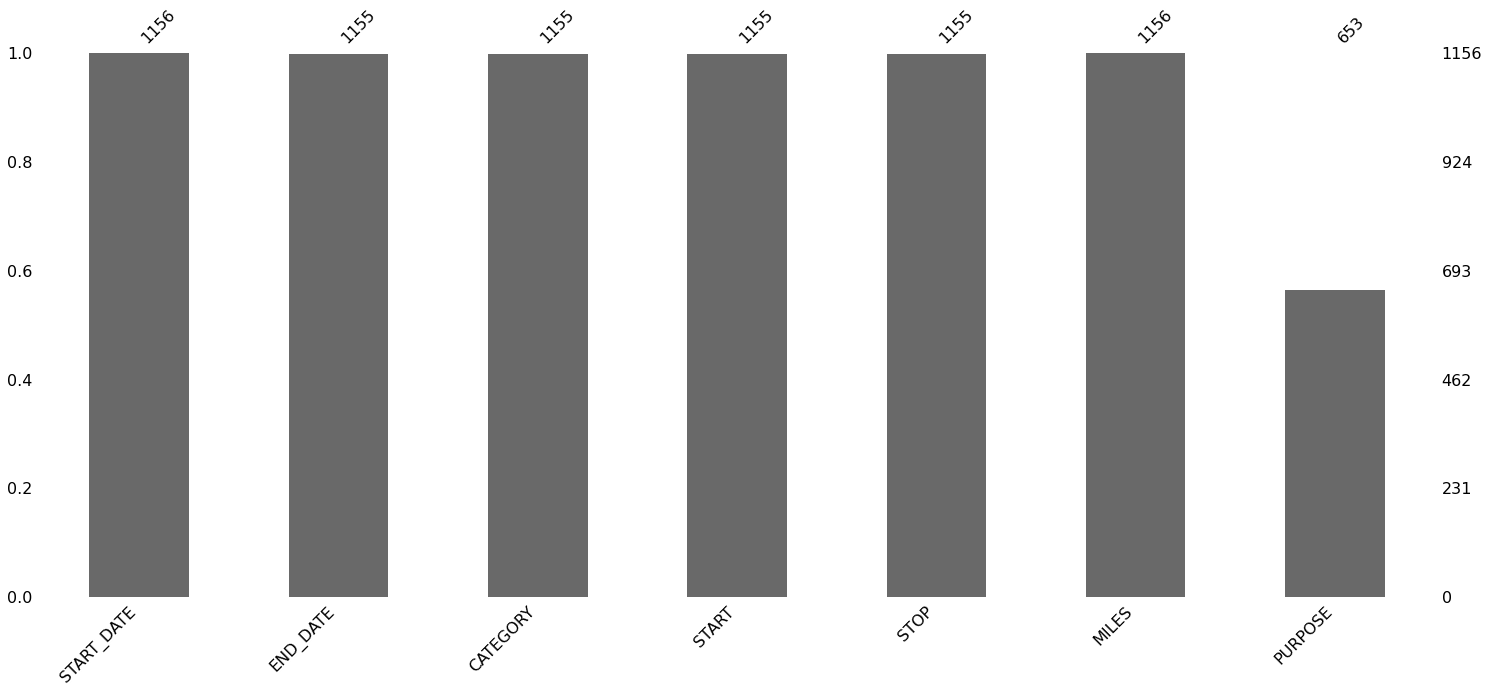

In [13]:
#visualize each column with how values it has
#we can see PURPOSE column has more null values
import missingno as msno
msno.bar(df)
plt.show()

In [14]:
#displaying null columns with count of null values
null_columns = df.columns[df.isnull().any()]
print(df[null_columns])
df[null_columns].isnull().sum()

              END_DATE  CATEGORY             START              STOP  \
0       1/1/2016 21:17  Business       Fort Pierce       Fort Pierce   
1        1/2/2016 1:37  Business       Fort Pierce       Fort Pierce   
2       1/2/2016 20:38  Business       Fort Pierce       Fort Pierce   
3       1/5/2016 17:45  Business       Fort Pierce       Fort Pierce   
4       1/6/2016 15:49  Business       Fort Pierce   West Palm Beach   
...                ...       ...               ...               ...   
1151  12/31/2016 13:42  Business           Kar?chi  Unknown Location   
1152  12/31/2016 15:38  Business  Unknown Location  Unknown Location   
1153  12/31/2016 21:50  Business        Katunayake           Gampaha   
1154  12/31/2016 23:51  Business           Gampaha         Ilukwatta   
1155               NaN       NaN               NaN               NaN   

              PURPOSE  
0      Meal/Entertain  
1                 NaN  
2     Errand/Supplies  
3             Meeting  
4      Customer

END_DATE      1
CATEGORY      1
START         1
STOP          1
PURPOSE     503
dtype: int64

In [15]:
null_columns = df.columns[df.isnull().any()]
print(df[null_columns])
df[null_columns].isnull().sum()

              END_DATE  CATEGORY             START              STOP  \
0       1/1/2016 21:17  Business       Fort Pierce       Fort Pierce   
1        1/2/2016 1:37  Business       Fort Pierce       Fort Pierce   
2       1/2/2016 20:38  Business       Fort Pierce       Fort Pierce   
3       1/5/2016 17:45  Business       Fort Pierce       Fort Pierce   
4       1/6/2016 15:49  Business       Fort Pierce   West Palm Beach   
...                ...       ...               ...               ...   
1151  12/31/2016 13:42  Business           Kar?chi  Unknown Location   
1152  12/31/2016 15:38  Business  Unknown Location  Unknown Location   
1153  12/31/2016 21:50  Business        Katunayake           Gampaha   
1154  12/31/2016 23:51  Business           Gampaha         Ilukwatta   
1155               NaN       NaN               NaN               NaN   

              PURPOSE  
0      Meal/Entertain  
1                 NaN  
2     Errand/Supplies  
3             Meeting  
4      Customer

END_DATE      1
CATEGORY      1
START         1
STOP          1
PURPOSE     503
dtype: int64

In [16]:
df.drop(index=1155,axis=0,inplace=True)


In [17]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site


In [18]:
df.tail()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [19]:
#here PURPOSE column is containing nore null values
#we may dropiyt that column but in this dataset we felt this coulmn is impotantt
#so we would like to replace that with forward filling
df['PURPOSE'].fillna(method='ffill',inplace=True)

In [20]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site


In [21]:
df.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

In [22]:
#we need work with start and end date so,we are coneverting the datatypes object to date
#errors values is to manage if there are any format issues like mm/dd/yyyy or dd/mm/yyyy final it convert it into one format
df['START_DATE']= pd.to_datetime(df['START_DATE'],errors='coerce')
df['END_DATE']= pd.to_datetime(df['END_DATE'],errors='coerce')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     1155 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 72.2+ KB


In [24]:
df['START_DATE'],df['END_DATE']

(0      2016-01-01 21:11:00
 1      2016-01-02 01:25:00
 2      2016-01-02 20:25:00
 3      2016-01-05 17:31:00
 4      2016-01-06 14:42:00
                ...        
 1150   2016-12-31 01:07:00
 1151   2016-12-31 13:24:00
 1152   2016-12-31 15:03:00
 1153   2016-12-31 21:32:00
 1154   2016-12-31 22:08:00
 Name: START_DATE, Length: 1155, dtype: datetime64[ns],
 0      2016-01-01 21:17:00
 1      2016-01-02 01:37:00
 2      2016-01-02 20:38:00
 3      2016-01-05 17:45:00
 4      2016-01-06 15:49:00
                ...        
 1150   2016-12-31 01:14:00
 1151   2016-12-31 13:42:00
 1152   2016-12-31 15:38:00
 1153   2016-12-31 21:50:00
 1154   2016-12-31 23:51:00
 Name: END_DATE, Length: 1155, dtype: datetime64[ns])

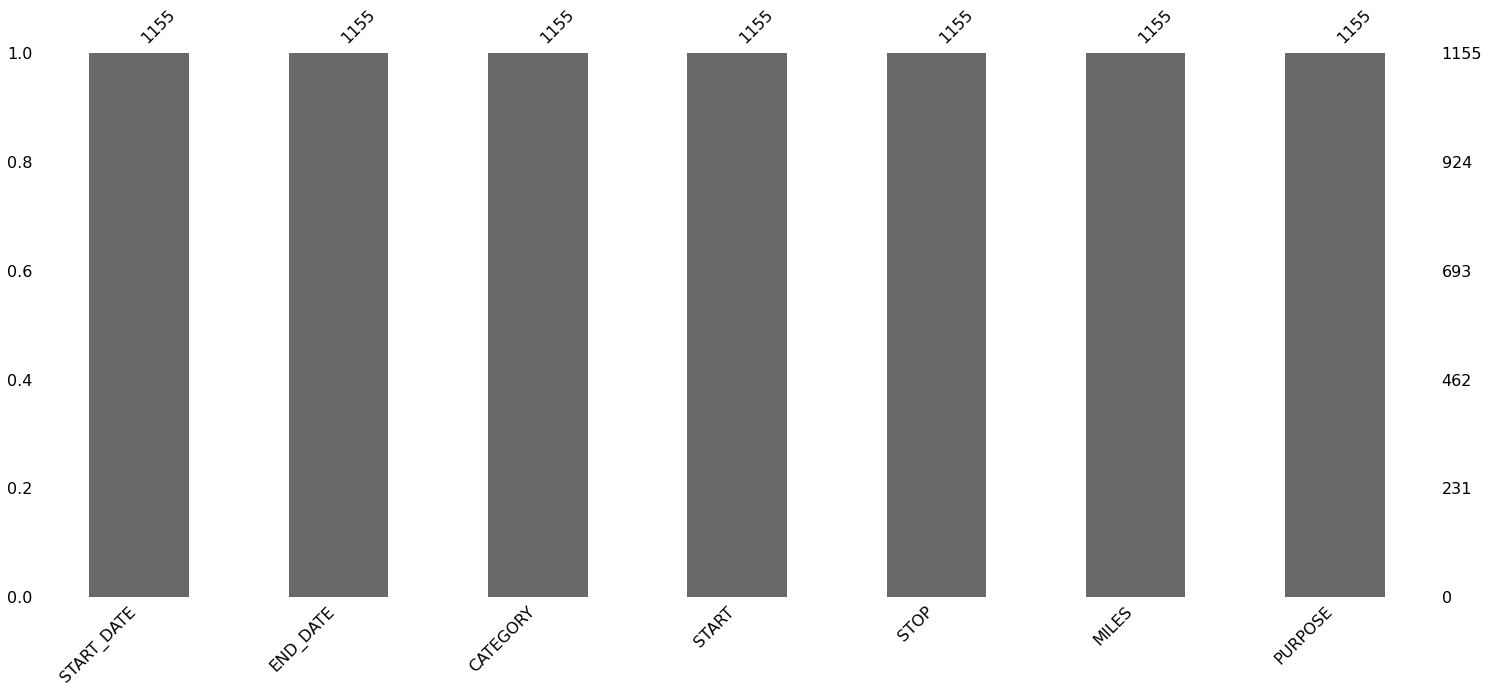

In [25]:
msno.bar(df)
plt.show()

In [26]:
#kind of group by by CATEGORY
#we are getting in CATEGIORY hoe many drives are per this type of category
category = pd.crosstab(index=df['CATEGORY'],columns ='count of travel per category')
category

col_0,count of travel per category
CATEGORY,
Business,1078
Personal,77


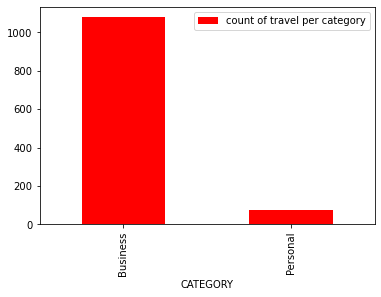

In [27]:
category.plot(kind='bar',color='r')
plt.legend()

In [28]:
start_counts = df.START.value_counts()
start_counts

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
                   ... 
East Austin           1
Briar Meadow          1
Mcvan                 1
Austin                1
Eagle Rock            1
Name: START, Length: 177, dtype: int64

In [29]:
start_counts[start_counts>10]

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Durham               37
Lahore               36
Raleigh              28
Kar?chi              27
Westpark Place       17
Apex                 17
Berkeley             16
Midtown              14
Kenner               11
R?walpindi           11
Kissimmee            11
Name: START, dtype: int64

<AxesSubplot:ylabel='START'>

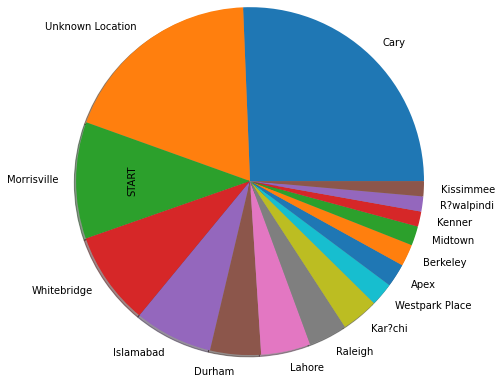

In [30]:
start_counts[start_counts>10].plot(kind='pie',shadow='True',radius=2)

<AxesSubplot:>

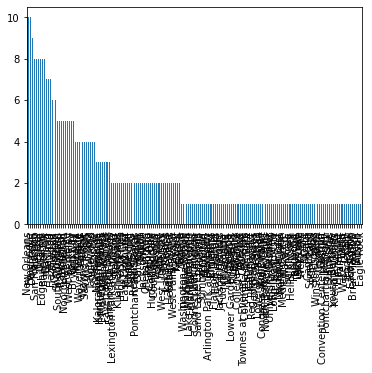

In [31]:
start_counts[start_counts<=10].plot(kind='bar')

In [32]:
end_counts = df.END_DATE.value_counts()

In [33]:
end_counts

2016-06-28 23:59:00    2
2016-11-25 12:04:00    1
2016-12-10 22:21:00    1
2016-01-28 16:51:00    1
2016-02-26 14:46:00    1
                      ..
2016-06-27 10:39:00    1
2016-10-13 12:14:00    1
2016-12-29 15:16:00    1
2016-11-06 20:21:00    1
2016-07-21 17:51:00    1
Name: END_DATE, Length: 1154, dtype: int64

<AxesSubplot:ylabel='END_DATE'>

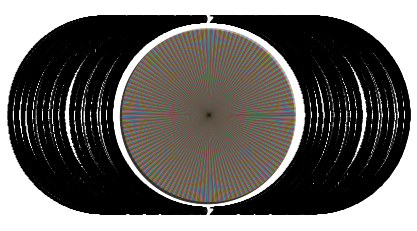

In [34]:
end_counts[end_counts>=1].plot(kind='pie',shadow=True)

In [35]:
miles = df.MILES.value_counts()
miles

9.9      28
3.1      26
2.1      19
10.4     19
2.5      19
         ..
310.3     1
11.1      1
10.7      1
195.6     1
22.7      1
Name: MILES, Length: 256, dtype: int64

<AxesSubplot:ylabel='MILES'>

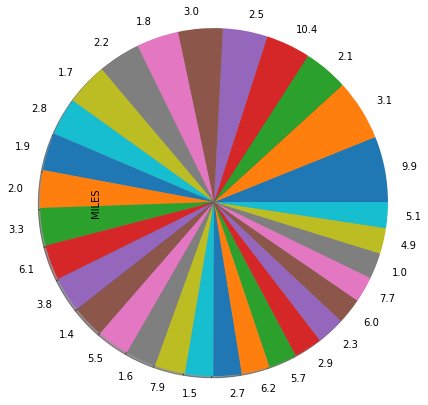

In [36]:
miles[miles>10].plot(kind='pie',shadow=True,radius=2)

<AxesSubplot:>

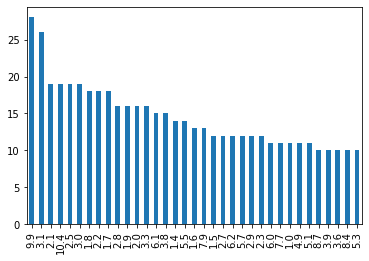

In [37]:
miles[miles>=10].plot(kind='bar')

col_0,no.of miles traveled
MILES,
False,840
True,315


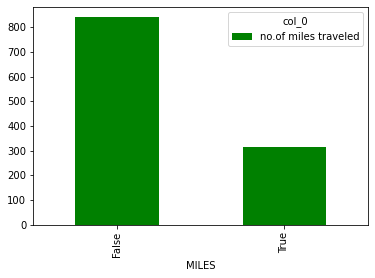

In [38]:
miles=pd.crosstab(index=df['MILES']>10,columns="no.of miles traveled")
miles.plot(kind='bar',color='g')
miles

In [39]:
df.PURPOSE.value_counts()

Meeting            308
Meal/Entertain     245
Temporary Site     196
Errand/Supplies    173
Customer Visit     155
Airport/Travel      54
Between Offices     18
Moving               4
Commute              1
Charity ($)          1
Name: PURPOSE, dtype: int64

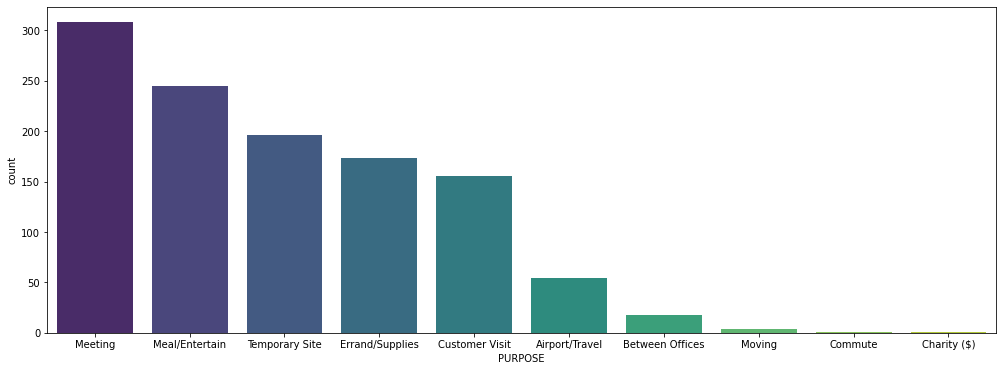

In [40]:
plt.figure(figsize=(17,6))
sns.countplot(df['PURPOSE'],order=df['PURPOSE'].value_counts().index,palette='viridis')
plt.show()

In [41]:
#
df['minutes']=df['END_DATE']-df['START_DATE']
df['minutes']

0      0 days 00:06:00
1      0 days 00:12:00
2      0 days 00:13:00
3      0 days 00:14:00
4      0 days 01:07:00
             ...      
1150   0 days 00:07:00
1151   0 days 00:18:00
1152   0 days 00:35:00
1153   0 days 00:18:00
1154   0 days 01:43:00
Name: minutes, Length: 1155, dtype: timedelta64[ns]

In [42]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,minutes
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,0 days 00:06:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,0 days 00:12:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,0 days 00:13:00
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,0 days 00:14:00
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,0 days 01:07:00


In [43]:
df['minutes']=df['minutes'].dt.total_seconds()/60


In [44]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,minutes
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0


In [45]:
pd.DataFrame({'Mean':df.groupby(['PURPOSE'])['MILES'].mean().round(1),
             'Min':df.groupby(['PURPOSE'])['MILES'].min(),
             'Max':df.groupby(['PURPOSE'])['MILES'].max()})

,Mean,Min,Max
PURPOSE,,,
Airport/Travel,15.0,0.9,156.9
Between Offices,10.9,1.9,39.2
Charity ($),15.1,15.1,15.1
Commute,180.2,180.2,180.2
Customer Visit,16.1,0.6,310.3
Errand/Supplies,5.9,0.5,195.3
Meal/Entertain,5.8,0.6,36.5
Meeting,12.7,0.7,201.0
Moving,4.6,3.3,6.1


In [46]:
pd.DataFrame({'Mean':df.groupby(['PURPOSE'])['MILES'].mean().round(1),
             'Min':df.groupby(['PURPOSE'])['MILES'].min(),
             'Max':df.groupby(['PURPOSE'])['MILES'].max()}).reset_index()

,PURPOSE,Mean,Min,Max
0,Airport/Travel,15.0,0.9,156.9
1,Between Offices,10.9,1.9,39.2
2,Charity ($),15.1,15.1,15.1
3,Commute,180.2,180.2,180.2
4,Customer Visit,16.1,0.6,310.3
5,Errand/Supplies,5.9,0.5,195.3
6,Meal/Entertain,5.8,0.6,36.5
7,Meeting,12.7,0.7,201.0
8,Moving,4.6,3.3,6.1
9,Temporary Site,11.0,0.7,195.6


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'Errand/Supplies'),
  Text(2, 0, 'Meeting'),
  Text(3, 0, 'Customer Visit'),
  Text(4, 0, 'Temporary Site'),
  Text(5, 0, 'Between Offices'),
  Text(6, 0, 'Charity ($)'),
  Text(7, 0, 'Commute'),
  Text(8, 0, 'Moving'),
  Text(9, 0, 'Airport/Travel')])

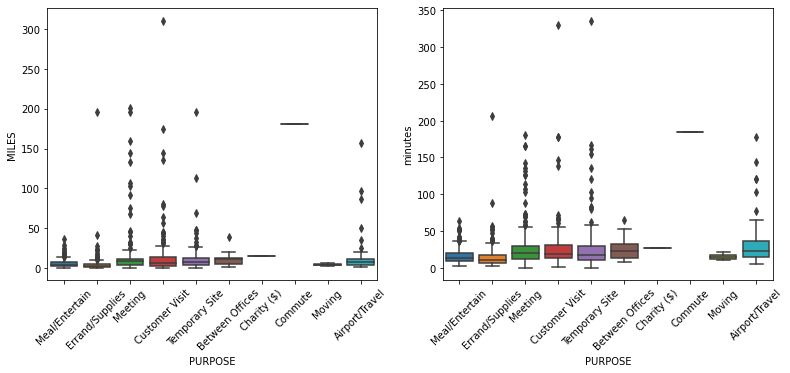

In [47]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.boxplot(data=df,x=df.PURPOSE,y=df.MILES)
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.boxplot(data=df,x=df.PURPOSE,y=df.minutes)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'Errand/Supplies'),
  Text(2, 0, 'Meeting'),
  Text(3, 0, 'Customer Visit'),
  Text(4, 0, 'Temporary Site'),
  Text(5, 0, 'Between Offices'),
  Text(6, 0, 'Charity ($)'),
  Text(7, 0, 'Commute'),
  Text(8, 0, 'Moving'),
  Text(9, 0, 'Airport/Travel')])

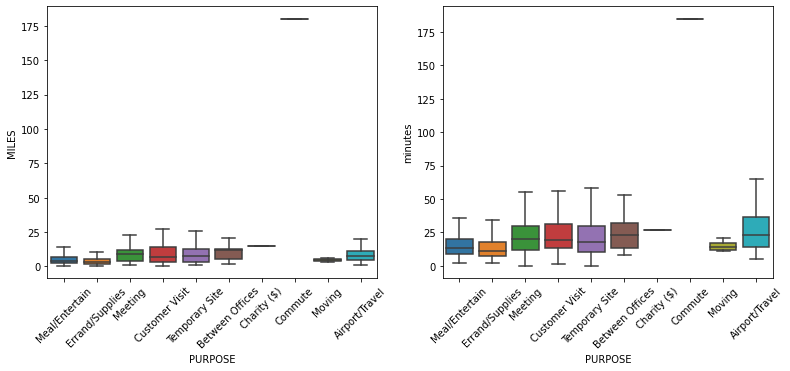

In [48]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.boxplot(data=df,x=df.PURPOSE,y=df.MILES,showfliers=False)
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.boxplot(data=df,x=df.PURPOSE,y=df.minutes,showfliers=False)
plt.xticks(rotation=45)

In [49]:
#checking round trip or not
plt.figure(figsize=(13,4))
def round(x):
    if x['START']==x['STOP']:
        return 'yes'
    else:
        return 'no'
df['Round_Trip']=df.apply(round,axis=1)
df.Round_Trip

0       yes
1       yes
2       yes
3       yes
4        no
       ... 
1150    yes
1151     no
1152    yes
1153     no
1154     no
Name: Round_Trip, Length: 1155, dtype: object

<Figure size 936x288 with 0 Axes>

In [50]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,minutes,Round_Trip
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,yes
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0,yes
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,yes
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,yes
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,no
...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,7.0,yes
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,18.0,no
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,35.0,yes
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,18.0,no


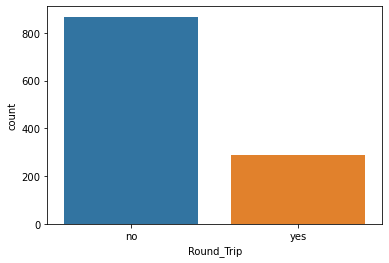

In [51]:
sns.countplot(df['Round_Trip'],order=df['Round_Trip'].value_counts().index)
plt.show()

In [52]:
df['Month']=pd.DatetimeIndex(df['START_DATE']).month

In [53]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,minutes,Round_Trip,Month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,yes,1
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0,yes,1
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,yes,1
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,yes,1
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,no,1


In [54]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,minutes,Round_Trip,Month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,yes,1
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0,yes,1
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,yes,1
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,yes,1
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,no,1
...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,7.0,yes,12
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,18.0,no,12
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,35.0,yes,12
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,18.0,no,12


In [56]:
dic ={1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'agust',9:'sep',10:'oct',11:'nov',12:'dec'}
df['Month']=df['Month'].map(dic)

In [57]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,minutes,Round_Trip,Month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,yes,jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0,yes,jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,yes,jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,yes,jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,no,jan
...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,7.0,yes,dec
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,18.0,no,dec
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,35.0,yes,dec
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,18.0,no,dec


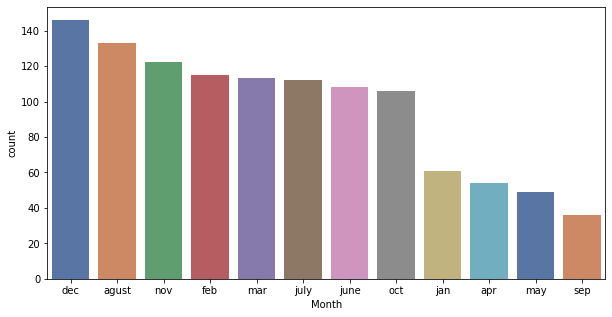

In [59]:
plt.figure(figsize=(10,5))
sns.countplot(df['Month'],order=df['Month'].value_counts().index,palette='deep')
plt.show()

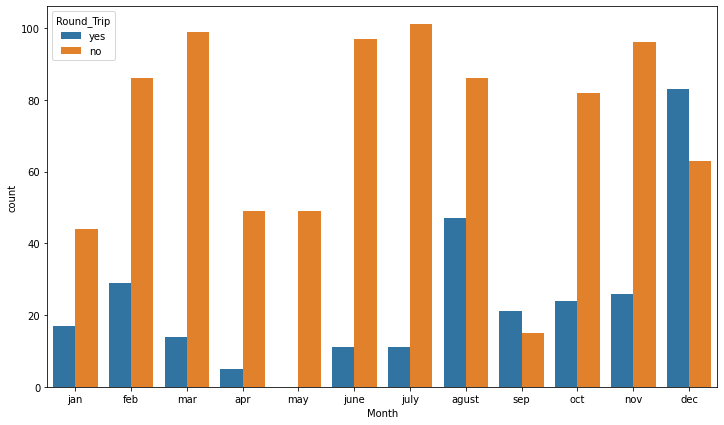

In [60]:
plt.figure(figsize=(12,7))
a=sns.countplot(df['Month'],hue=df['Round_Trip'])
plt.show()

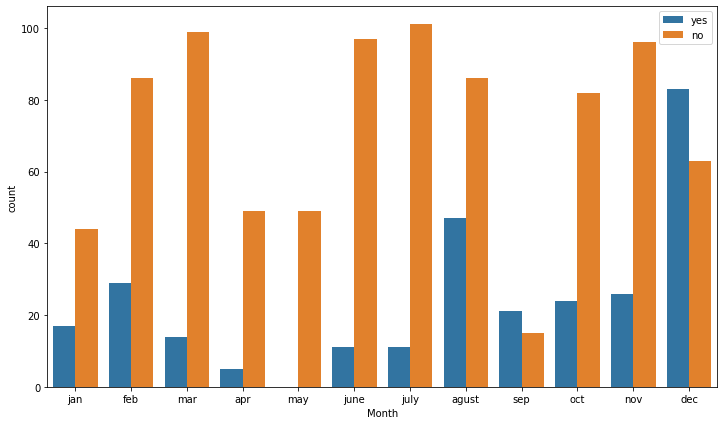

In [61]:
plt.figure(figsize=(12,7))
sns.countplot(df['Month'],hue=df['Round_Trip'])
plt.legend()
plt.show()

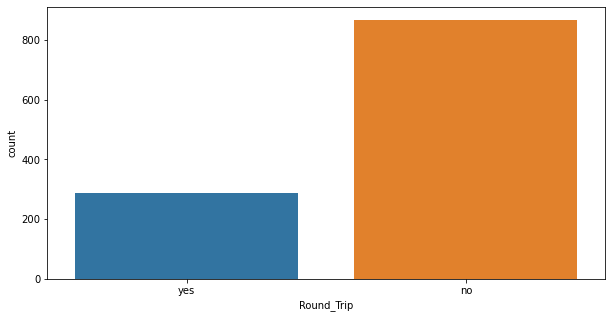

In [62]:
plt.figure(figsize=(10,5))
sns.countplot(df['Round_Trip'])
plt.show()

<AxesSubplot:xlabel='minutes', ylabel='MILES'>

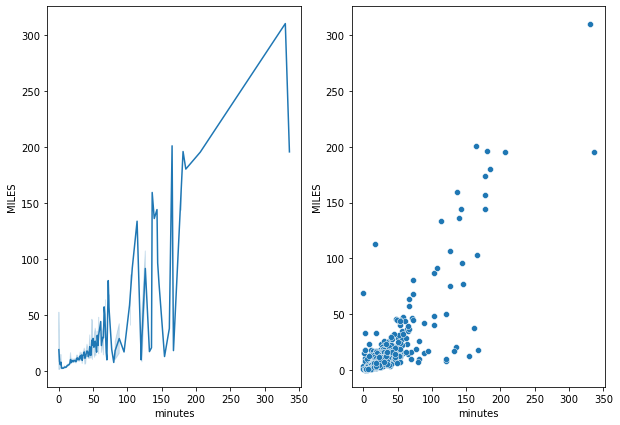

In [69]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
sns.lineplot(data=df,x=df.minutes,y=df.MILES)
plt.subplot(1,2,2)
sns.scatterplot(data=df,x=df.minutes,y=df.MILES)

In [68]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,minutes,Round_Trip,Month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,yes,jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0,yes,jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,yes,jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,yes,jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,no,jan
...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,7.0,yes,dec
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,18.0,no,dec
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,35.0,yes,dec
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,18.0,no,dec


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'Errand/Supplies'),
  Text(2, 0, 'Meeting'),
  Text(3, 0, 'Customer Visit'),
  Text(4, 0, 'Temporary Site'),
  Text(5, 0, 'Between Offices'),
  Text(6, 0, 'Charity ($)'),
  Text(7, 0, 'Commute'),
  Text(8, 0, 'Moving'),
  Text(9, 0, 'Airport/Travel')])

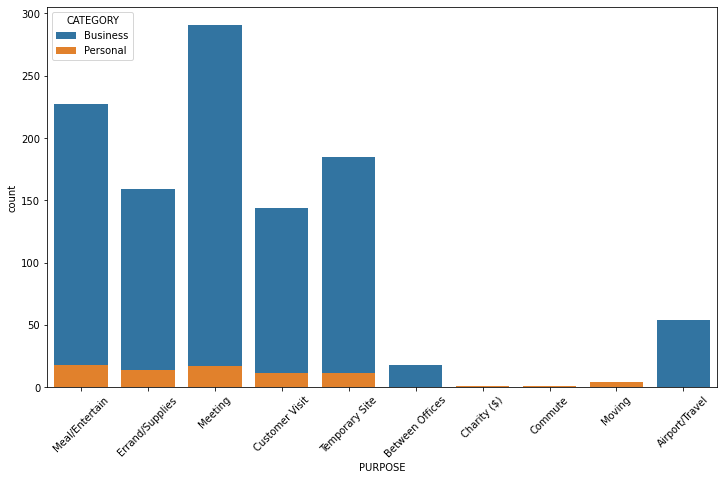

In [73]:
plt.figure(figsize=(12,7))
sns.countplot(data=df,x='PURPOSE',hue='CATEGORY',dodge=False)
plt.xticks(rotation=45)

(array([  0.,  50., 100., 150., 200., 250., 300., 350.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

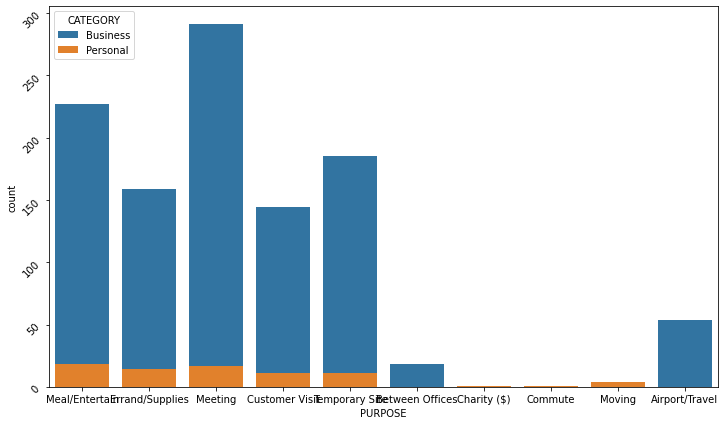

In [74]:
plt.figure(figsize=(12,7))
sns.countplot(data=df,x='PURPOSE',hue='CATEGORY',dodge=False)
plt.yticks(rotation=45)

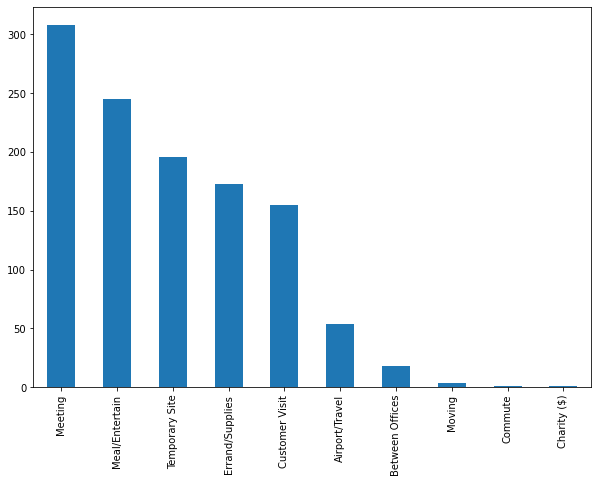

In [78]:
plt.figure(figsize=(10,7))
pd.Series(df['PURPOSE']).value_counts()[0:25].plot(kind='bar')
plt.show()